><h1>Implementing a 3-qubit adder using quantum logic gates</h1>
<br>

<div>
<img src="/workspaces/Quantum-Playground/Figures/3QubitAdderTruthTable.png">
<span>Table: 3 Qubit Adder Truth Table</span>
</div>
<br>

><h2>Logic (Generalization)</h2>
<ol>
 <li> Initially all qubits are 0</li>
 <li> q5 and q7 are our Sum and Carry respectively</li>
 <li> q1-q4, green and blue cells can be generalized into 2 qubit adder, we need to work on the rest</li>
 <li> These work the same as 2 qubit adder - If there is any 1 between Inputs (A, B+C), the Sum is 1, If A and B+C are the same, the Sum is 0</li>
</ol>
 <br>

><h2>Implementation</h2>

> 

In [29]:
from qiskit import *
from math import pi
%matplotlib inline

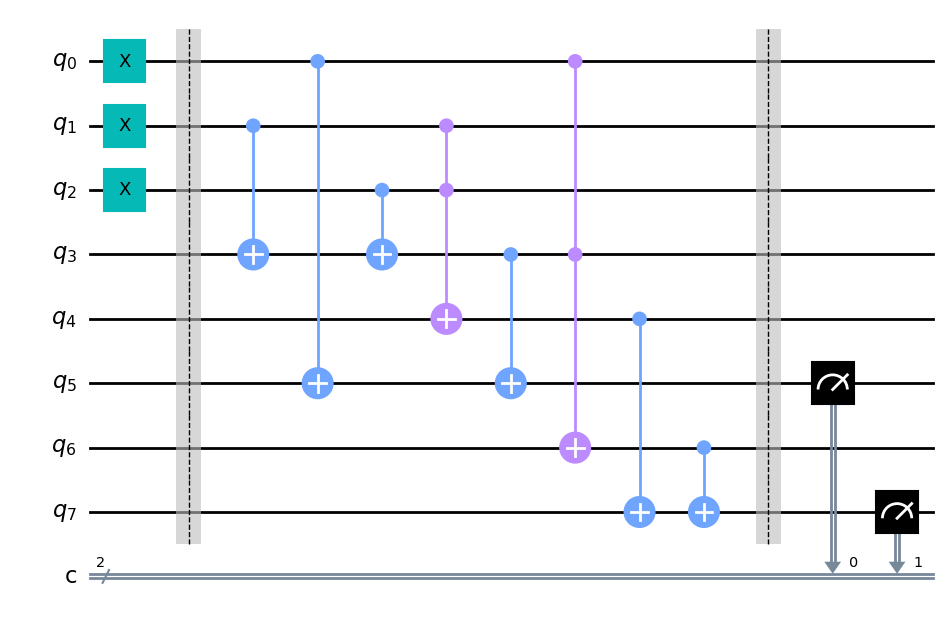

In [30]:
circuit = QuantumCircuit(8, 2)
# Initialize A, B, C
circuit.x(0) #A
circuit.x(1) #B
circuit.x(2) #C


circuit.barrier()
# 3 Qubit Adder
# q3 = q1+q2
circuit.cx(1, 3)
circuit.cx(2, 3)
circuit.ccx(1, 2, 4)  #carry

# q5 = q0+q3
circuit.cx(0, 5)
circuit.cx(3, 5)
circuit.ccx(0, 3, 6)  #carry

# Pattern between qubit 4,6, and 7
circuit.cx(4, 7)
circuit.cx(6, 7)


circuit.barrier()


circuit.measure([5,7],[0,1])
circuit.draw(output='mpl')

In [31]:
# simulate circuit and print SUM and CARRY
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(f'SUM: {list(counts.keys())[0][1]}')
print(f'CARRY: {list(counts.keys())[0][0]}')

SUM: 1
CARRY: 1
